# Importing Data 

In [28]:
import numpy as np
import os
from scipy import signal
import UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
import RockSat_1_14_fitting_functions as R_fitting
import json
import pandas as pd
import matplotlib.pyplot as plt
from RockSat_json import *

In [29]:
year = 2021
#packets = import_data(f'../{year}/{year}_packet.json')
packets = import_data(f'../packets/{year}_packet.json')

In [14]:
def get_sweep(sw, cn = 0):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

In [25]:
print(packets['packets']['Medium']['1'].keys())

dict_keys(['Start', 'Stop', 'Count', 'Voltage', 'Current0', 'Current1', 'Current2'])


In [31]:
ne_tot = []
te_tot = []
t = []
ctot = np.array([])
sw_tot = np.arange(0,int(len(packets['packets']['Medium']))) #Every single sweep
for i in sw_tot[0:2200]:
    V = packets['packets']['Medium'][f'{i}']['Voltage']
    I = packets['packets']['Medium'][f'{i}']['Current0']
    x, y, popt,pcov = R_fitting.gen_fit(np.array(V), np.array(I))
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'])
    ctot = np.append(ctot, packets['packets']['Medium'][f'{i}']['Count'])
    ne = popt[3] * 10**(-6) # To convert into cm^-3
    te = popt[4]

    ne_tot.append(ne)
    te_tot.append(te)
    t.append(start)

/Users/joshuagoodwill/Library/CloudStorage/GoogleDrive-goodwill@udel.edu/My Drive/DAPPEr/RockSat_1_14_fitting_functions.py:44: RuntimeWarning: invalid value encountered in sqrt
  return I0 * np.sqrt(1. + k*(x + V0))


In [34]:
fit = pd.DataFrame({'c': ctot,
             't': t,
             'ne': ne_tot,
             'Te': te_tot,})

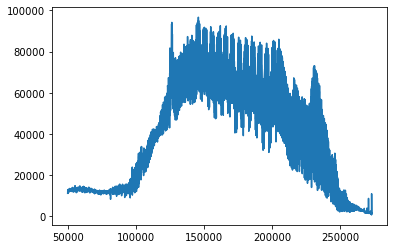

In [38]:
plt.plot(fit['t'], fit['ne'])

# Get Sweep and Saving Figures

In [11]:
def get_sweep(sw, cn = 0):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

In [12]:
sw_range = np.arange(0,int(len(packets['packets']['Medium'])), 100) 

FileNotFoundError: [Errno 2] No such file or directory: '../2021/Sweeps/sw_0.jpg'

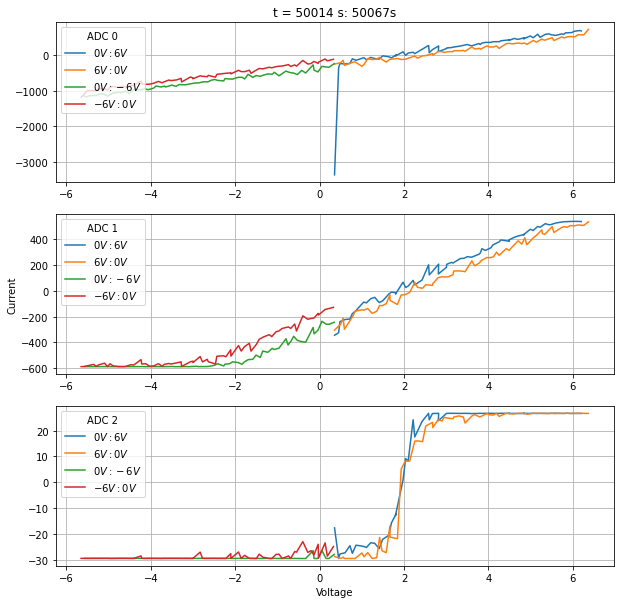

In [13]:
cn = 0
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in sw_range:
  for axnum in np.arange(len(axs)):
    axs[axnum].clear()
    cn = axnum
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'], cn = cn)

    axs[axnum].plot(V1, I1 , label = r'$ 0V : 6V$')
    axs[axnum].plot(V2, I2 , label = r'$ 6V:  0V$')
    axs[axnum].plot(V3, I3 , label = r'$ 0V: -6V$')
    axs[axnum].plot(V4, I4 , label = r'$-6V : 0V$')
    axs[axnum].legend(title = f'ADC {cn}', loc = 'upper left')
    axs[axnum].grid()
  axs[0].set_title(f't = {start} s: {stop}s')
  axs[2].set_xlabel('Voltage')
  axs[1].set_ylabel('Current')
  plt.savefig(f'../{year}/Sweeps/sw_{i}.jpg' , dpi = 400) 

# Objective for 3/20

Use gen fit 
 * popt = optimize parameters
  t is x, y is model 
extract popt  it will be an array of values array of values
* (Around 30)
Plot it to check to see if you have a good fit 

**Note**: Use Sweeps 1000 - 1900 as they show the best IV curves

* x, y, popt, pcov = genfit(V, I)
    * x and y will be your fitted IV curve
    * popt is an array of m, b ,and a
* look at electron saturation region eq, inside equation is B, get Te from that since everything is a constant besdies Te
* Look at line 44 in rock sat fitting functions 

In [ ]:
V = packets['packets']['Medium']['1000']['Voltage']
I = packets['packets']['Medium']['1000']['Current0']

Use log linear fit for voltage instead of normal linear fit

In [ ]:
# From Sweep 1000 to 1800 

In [ ]:
x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I)) # x is V, y is I
#print(x)
#print(y)
print(popt) #popt[0:xa,1:b,2:m1,3:n,4:t,5:V0] from rocksat fitting functions
#print(pcov)  
#plt.plot(x,y)

[ 5.34172231e-01 -3.81171970e+00  1.46941755e+02  6.10158388e+10
  8.65397277e+02 -5.67603410e-01]


In [ ]:
popt[0]

0.5341722309513347

In [ ]:
#Don't worry about this for now
#for i in range(len(pcov)):
    #print(pcov[i][i])

0.0007252135352356753
23106.924451542698
241200.16424548868
2.7017678873964273e+18
2.903715803212709e+17
2157825909.49563


_Q_: What are the units for the output?
* T is in Kelvin
* n is in m^3

Is it a good fit?

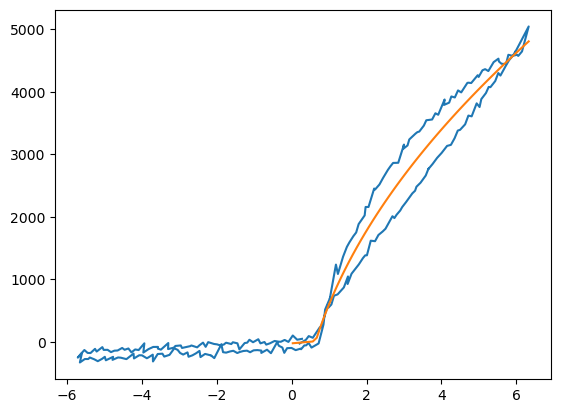

In [ ]:
plt.plot(V,I)
plt.plot(x,y)
# Limit to 1 V 

In [ ]:
sw_good = np.arange(1000,int(len(packets['packets']['Medium'],)), 100) 

In [ ]:
sweep = [] #List of sweeps between 1000 and 1900 
for i in range(len(sw_good)):
    if sw_good[i] < 1900: 
        sweep.append(sw_good[i])

print(sweep)

[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]


Text(0, 0.5, 'Density')

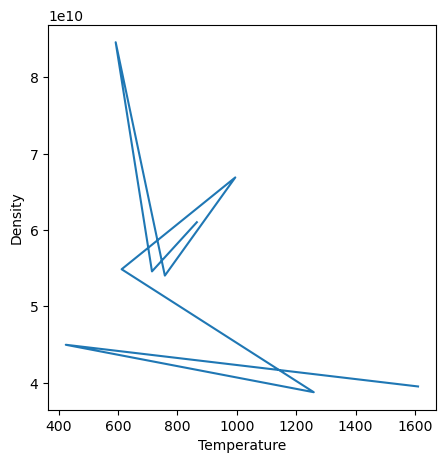

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
n = []
t = []
for i in range(len(sweep)):
  sweep_num = sweep[i]
  V = packets['packets']['Medium'][f'{sweep_num}']['Voltage']
  I = packets['packets']['Medium'][f'{sweep_num}']['Current0']
  x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  n.append(popt[3])
  t.append(popt[4])
  #x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  
    

ax.plot(t,n)    
#ax[0].set_title(f't = {start} s: {stop}s')
ax.set_xlabel('Temperature')
ax.set_ylabel('Density')
#plt.savefig(f'../{year}/Sweeps/sw_{i}.jpg' , dpi = 400) 

In [ ]:
for i in range(len(t)):
    print(t[i])


865.39727749284
714.2560287390756
591.9824578331031
757.660017407393
994.9074873369086
612.0910972712978
1259.2863605721182
423.8617712847565
1610.4500833214156


In [ ]:
for i in range(len(n)):
    print(n[i])

61015838792.71766
54573412938.77113
84594525046.6829
54023121824.07938
66884863541.768036
54855489653.18692
38746393858.670784
44963054703.13971
39500821969.14007


#### Testing

In [ ]:
for i in range(len(sweep)):
    x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))

In [ ]:
n_test = []
t_test = []
for i in range(2):
  sweep_num = sweep[i]
  V = packets['packets']['Medium'][f'{sweep_num}']['Voltage']
  I = packets['packets']['Medium'][f'{sweep_num}']['Current0']
  x, y, popt, pcov = R_fitting.gen_fit(np.array(V), np.array(I))
  n_test.append(popt[3])
  t_test.append(popt[4])

In [ ]:
n_test

[61015838792.71766, 54573412938.77113]

In [ ]:
#x = packets['packets']['Medium']['0']